In [1]:
from all_imports import *

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
from cifar10 import *

In [4]:
from mobile_net import *

In [5]:
bs=64
sz=32

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

In [8]:
data = get_data(sz, bs)

In [9]:
# tuple list of form
# expansion, out_planes, num_blocks, stride
tpl = [(1, 64, 2, 1),
       (3, 128, 2, 2),
       (3, 256, 2, 1), 
       (6, 128, 2, 2), 
       (6, 256, 2, 1)]

In [10]:
md_mbl = mblnetv2(exp_dw_block, 1, 64,
                          tpl,
                          num_classes=10)

In [11]:
learn = ConvLearner.from_model_data(md_mbl, data)

In [12]:
total_model_params(learn.summary())

Total parameters in the model :2718346


In [17]:
wd=1e-4
learn.opt_fn = partial(optim.Adam, betas=(0.95,0.99))

In [18]:
learn.save('init')

In [23]:
learn.load('init')

In [24]:
learn.lr_find(wds=wd, use_wd_sched=True)

 76%|███████▋  | 597/782 [00:57<00:17, 10.31it/s, loss=5.68]


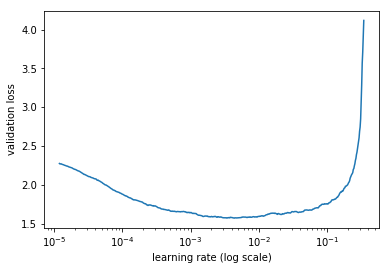

In [25]:
learn.sched.plot()

In [ ]:
lr=1e-4

In [ ]:
visl = VisdomLinePlotter(6009)
visc = visdom_callback(visl)

In [ ]:
learn.fit(5e-1, 1, wds=1e-4, cycle_len=30, use_clr_beta=(20,20,0.95,0.85), callbacks=[visc], 
          best_save_name='best_compact_mbnetv2_clrb_xp_1')

In [ ]:
learn.fit(1e-1, 1, wds=1e-4, cycle_len=30, use_clr_beta=(20,20,0.95,0.85), callbacks=[visc], 
          best_save_name='best_compact_mbnetv2_clrb_xp_2')

In [ ]:
learn.fit(1e-2, 1, wds=1e-4, cycle_len=30, use_clr_beta=(20,20,0.95,0.85), callbacks=[visc], 
          best_save_name='best_compact_mbnetv2_clrb_xp_3')